In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import folium

df = pd.read_csv('/kaggle/input/dhaka-rent-dataset/Dhaka Rent.csv', delimiter=';')

# Display the first few rows of the dataframe
df.head()



,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

area    0
rent    0
dtype: int64


**How to visualize the distribution of 'area' and 'rent' using histograms?**

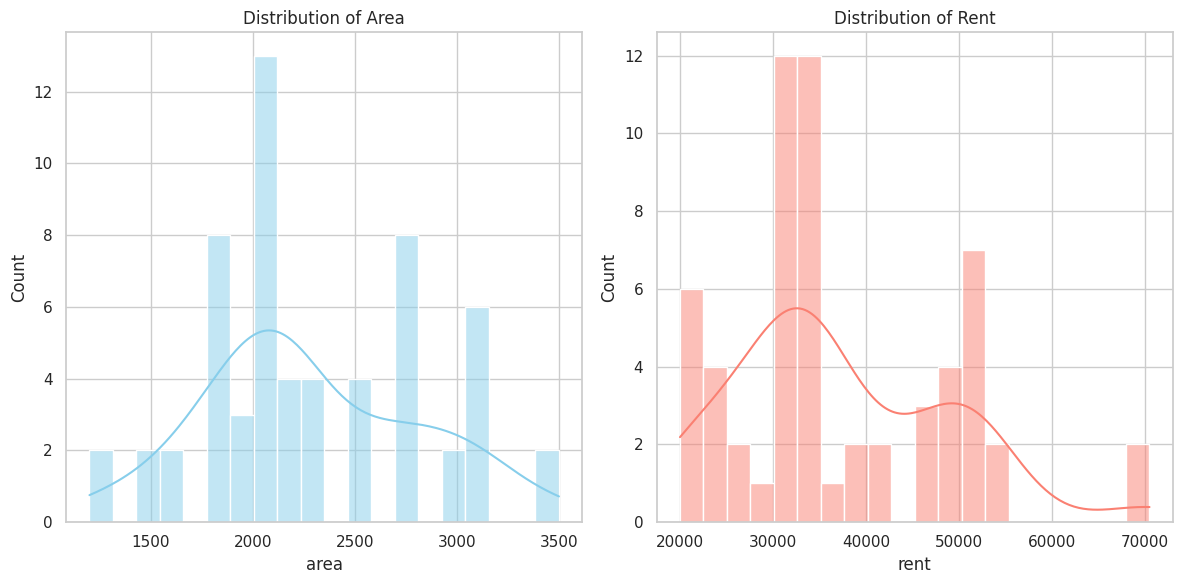

In [3]:
# Set up the visualization style
sns.set(style="whitegrid")

# Create histograms for 'area' and 'rent'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['area'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Area')

plt.subplot(1, 2, 2)
sns.histplot(df['rent'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Rent')

plt.tight_layout()
plt.show()

**What is the correlation between 'area' and 'rent'?**

In [4]:
# Calculate the correlation between 'area' and 'rent'
correlation = df['area'].corr(df['rent'])

# Display the correlation
print(f'Correlation between Area and Rent: {correlation:.2f}')


Correlation between Area and Rent: 0.97


**How to create a scatter plot to visualize the relationship between 'area' and 'rent'?**

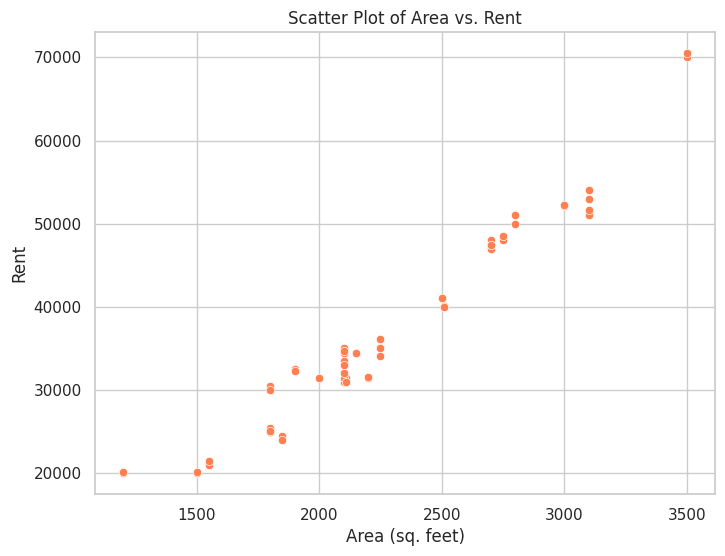

In [5]:
# Create a scatter plot for 'area' and 'rent'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='rent', data=df, color='coral')
plt.title('Scatter Plot of Area vs. Rent')
plt.xlabel('Area (sq. feet)')
plt.ylabel('Rent')
plt.show()


**How to visualize the trend in 'rent' over different 'area' values using a line plot?**

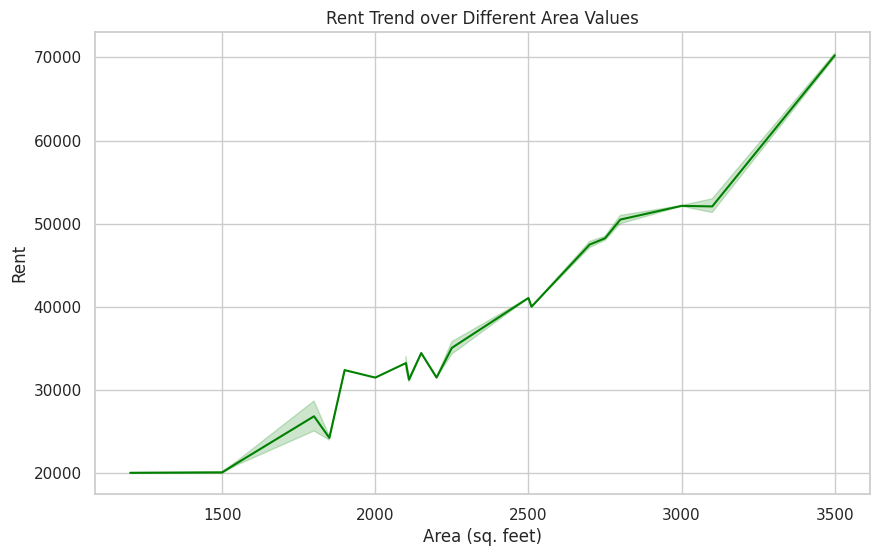

In [6]:
# Create a line plot to visualize the trend in 'rent' over different 'area' values
plt.figure(figsize=(10, 6))
sns.lineplot(x='area', y='rent', data=df, color='green')
plt.title('Rent Trend over Different Area Values')
plt.xlabel('Area (sq. feet)')
plt.ylabel('Rent')
plt.show()


**How does the distribution of 'rent' vary across different 'area' ranges using swarm plots?**

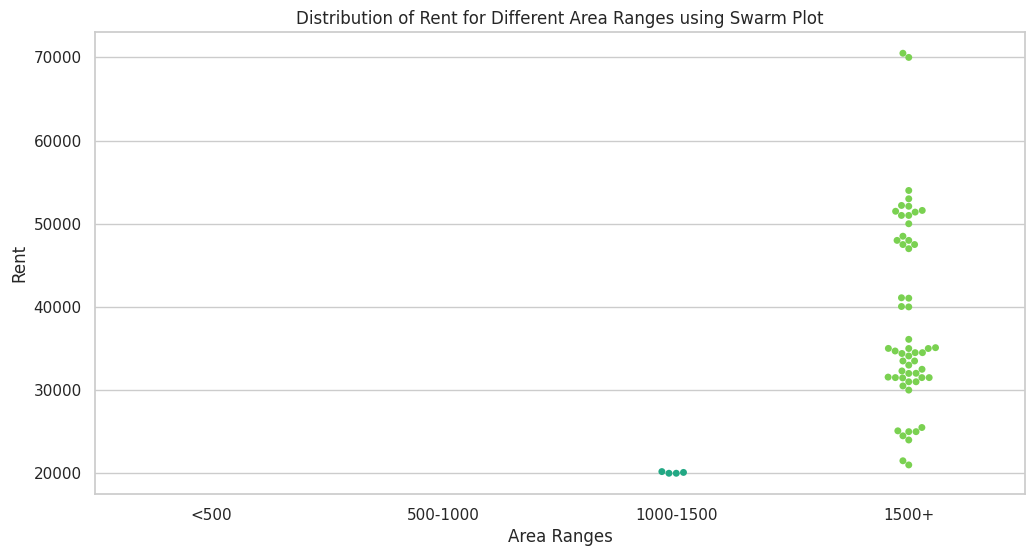

In [7]:
import warnings
warnings.filterwarnings('ignore')
# Create swarm plots to show the distribution of 'rent' for different 'area' ranges
plt.figure(figsize=(12, 6))
sns.swarmplot(x=pd.cut(df['area'], bins=[0, 500, 1000, 1500, np.inf], labels=['<500', '500-1000', '1000-1500', '1500+']),
              y='rent', data=df, palette='viridis')
plt.title('Distribution of Rent for Different Area Ranges using Swarm Plot')
plt.xlabel('Area Ranges')
plt.ylabel('Rent')
plt.show()


**Can we visualize the joint distribution of 'area' and 'rent' using a scatter plot with marginal distributions?**

<Figure size 1000x800 with 0 Axes>

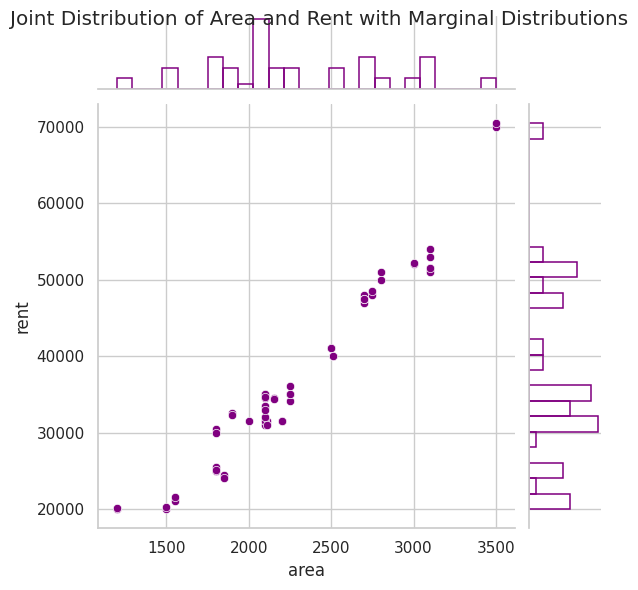

In [8]:
# Create a scatter plot with marginal distributions for 'area' and 'rent'
plt.figure(figsize=(10, 8))
sns.jointplot(x='area', y='rent', data=df, kind='scatter', marginal_kws=dict(bins=25, fill=False), color='purple')
plt.suptitle('Joint Distribution of Area and Rent with Marginal Distributions')
plt.show()


**How to use a pair plot to visualize the relationships between 'area' and 'rent' along with their distributions?**

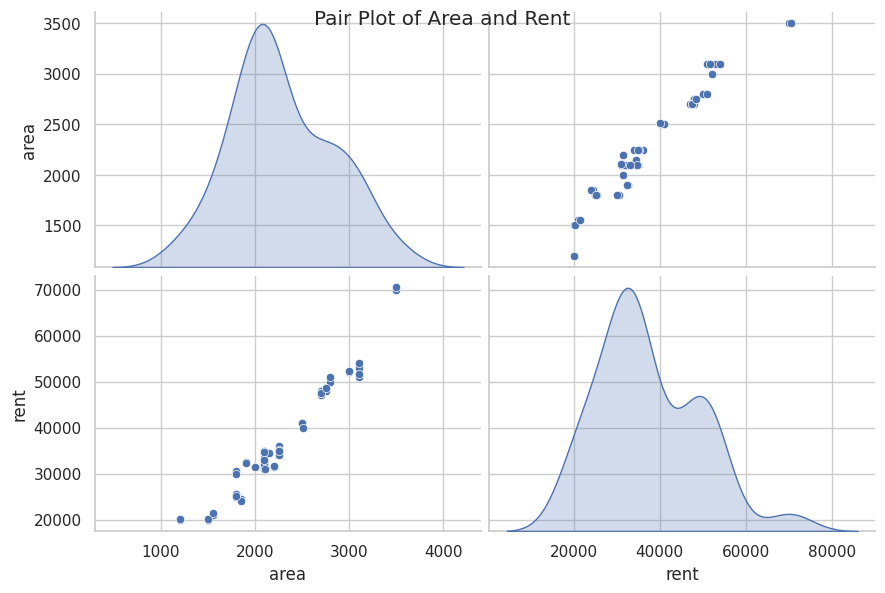

In [9]:
# Create a pair plot for 'area' and 'rent'
sns.pairplot(df[['area', 'rent']], height=3, aspect=1.5, kind='scatter', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Area and Rent')
plt.show()


**Can we create an interactive scatter plot using Plotly to explore 'area' and 'rent'?**

In [10]:
# Import Plotly
import plotly.express as px

# Create an interactive scatter plot using Plotly
fig = px.scatter(df, x='area', y='rent', title='Interactive Scatter Plot of Area and Rent', labels={'area': 'Area (sq. feet)', 'rent': 'Rent'})
fig.show()


**How does the distribution of 'rent' vary with different 'area' values using rug plots?**

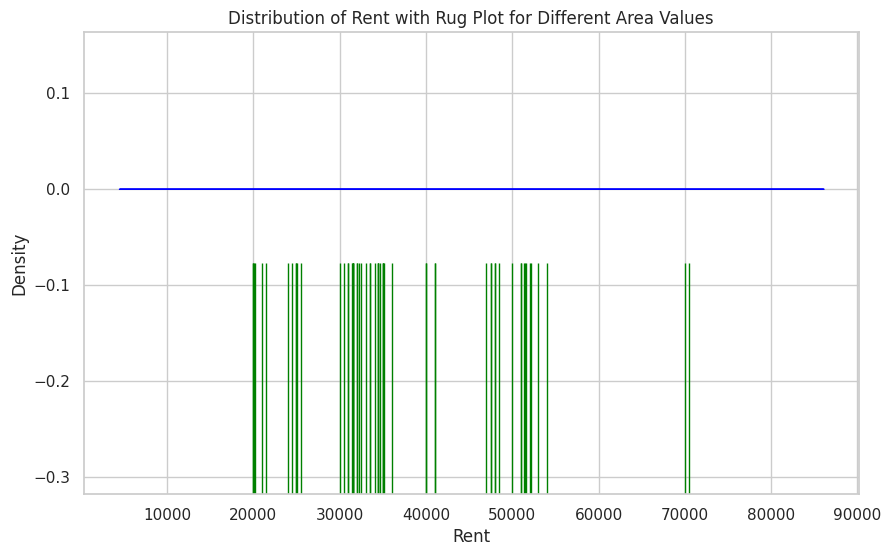

In [11]:
# Create rug plots to show the distribution of 'rent' for different 'area' values
plt.figure(figsize=(10, 6))
sns.rugplot(x='rent', data=df, height=0.5, color='green')
sns.kdeplot(x='rent', data=df, color='blue', fill=True, alpha=0.3)
plt.title('Distribution of Rent with Rug Plot for Different Area Values')
plt.xlabel('Rent')
plt.show()


**Can we visualize the cumulative distribution of 'rent' using an ECDF (Empirical Cumulative Distribution Function) plot?**

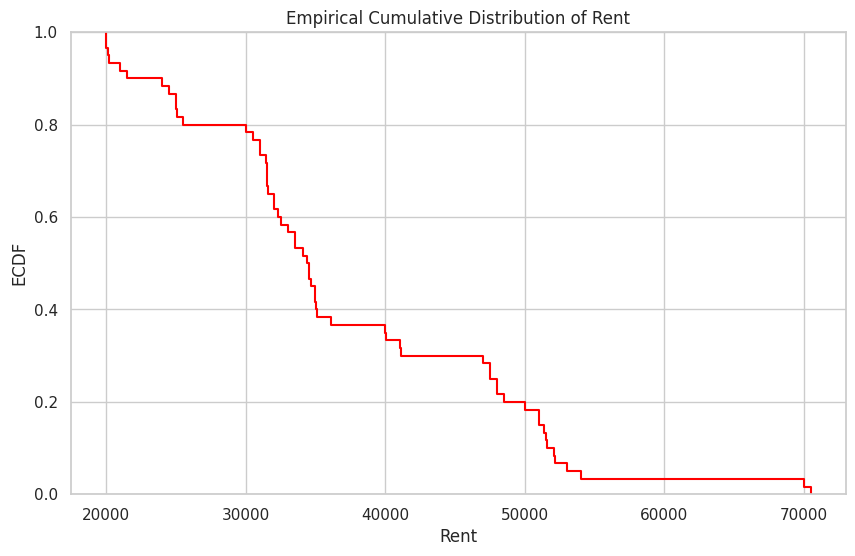

In [12]:
# Create an ECDF plot for 'rent'
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='rent', complementary=True, color='red')
plt.title('Empirical Cumulative Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('ECDF')
plt.show()


**How to create a scatter plot with a trendline to visualize the relationship between 'area' and 'rent'?**

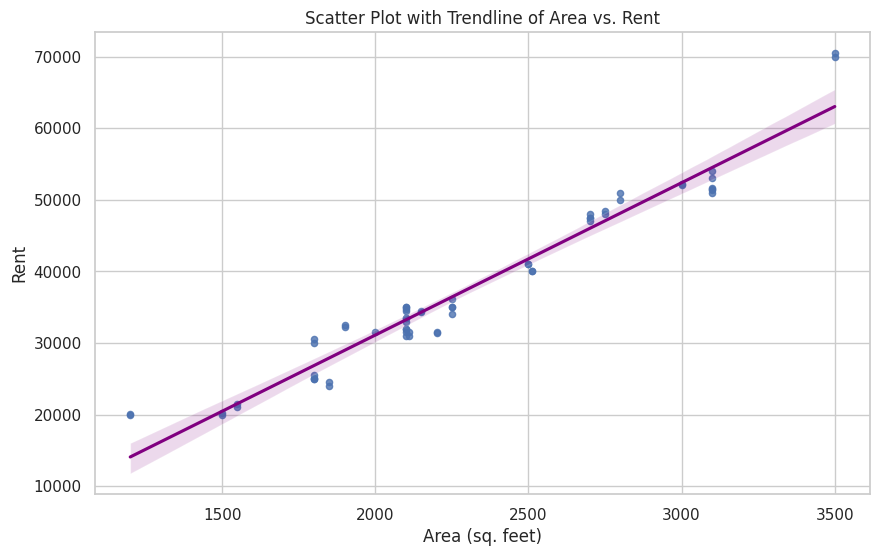

In [13]:
# Create a scatter plot with a trendline for 'area' and 'rent'
plt.figure(figsize=(10, 6))
sns.regplot(x='area', y='rent', data=df, scatter_kws={'s': 20}, line_kws={'color': 'purple'})
plt.title('Scatter Plot with Trendline of Area vs. Rent')
plt.xlabel('Area (sq. feet)')
plt.ylabel('Rent')
plt.show()


**What is the distribution of 'rent' for different 'area' categories using a beeswarm plot?**

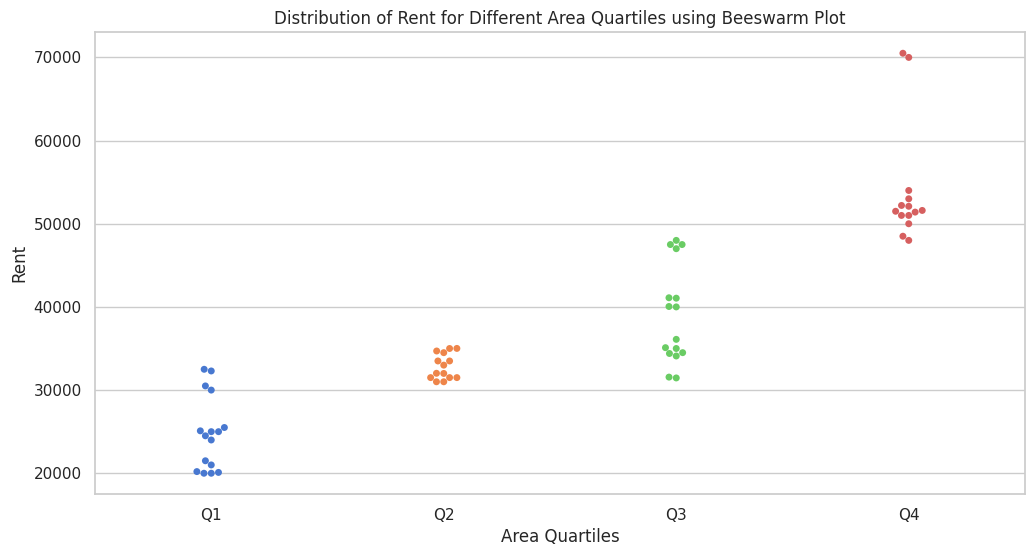

In [14]:
# Create a beeswarm plot to visualize the distribution of 'rent' for different 'area' categories
plt.figure(figsize=(12, 6))
sns.swarmplot(x=pd.qcut(df['area'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4']),
              y='rent', data=df, palette='muted')
plt.title('Distribution of Rent for Different Area Quartiles using Beeswarm Plot')
plt.xlabel('Area Quartiles')
plt.ylabel('Rent')
plt.show()


**How does the distribution of 'rent' change across different 'area' values using a kernel density estimate plot?**

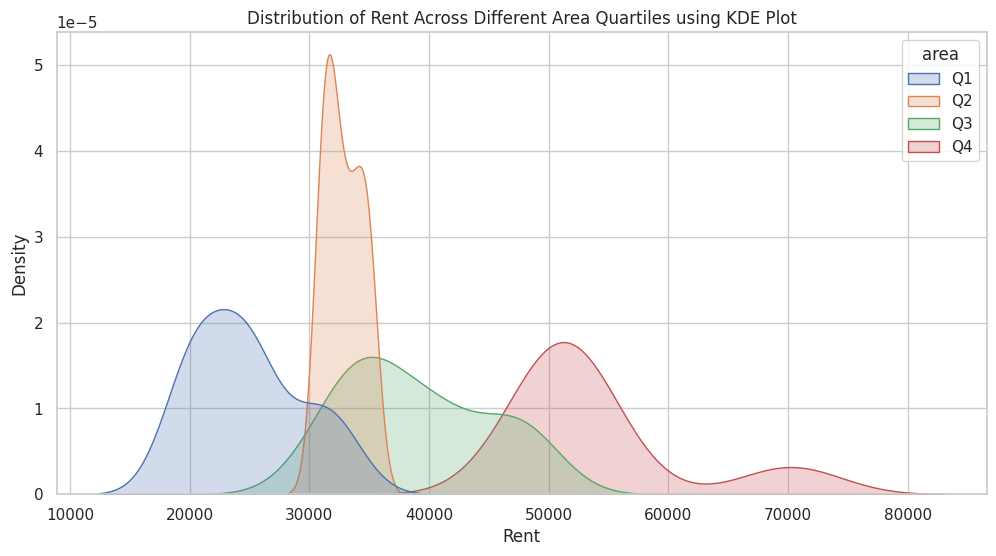

In [15]:
# Create a kernel density estimate (KDE) plot for 'rent' with different 'area' values
plt.figure(figsize=(12, 6))
sns.kdeplot(x='rent', hue=pd.qcut(df['area'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4']), data=df, fill=True)
plt.title('Distribution of Rent Across Different Area Quartiles using KDE Plot')
plt.xlabel('Rent')
plt.show()


**What is the pairwise correlation between numerical variables in the dataset?**

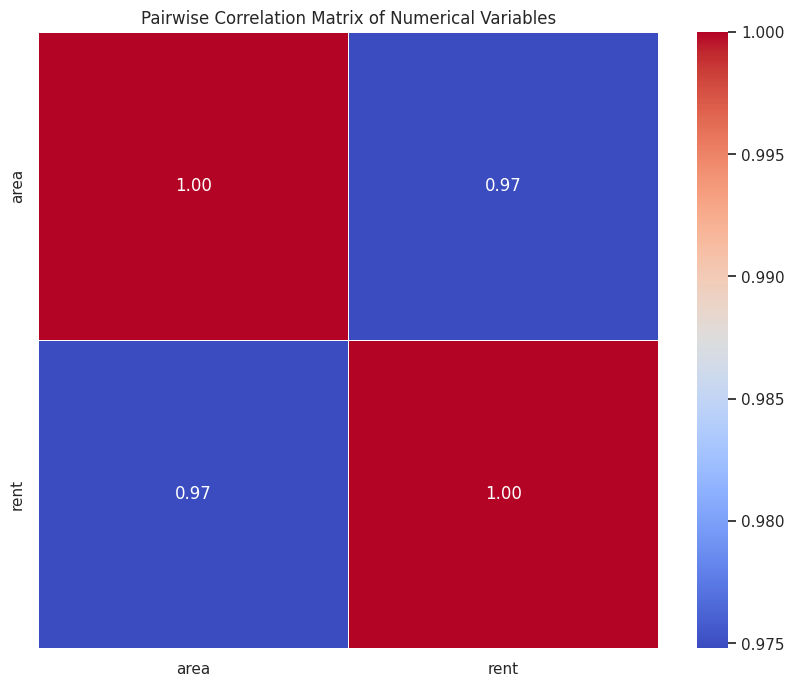

In [16]:
# Calculate pairwise correlation between numerical variables
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pairwise Correlation Matrix of Numerical Variables')
plt.show()


**How to create a density contour plot for 'area' and 'rent'?**

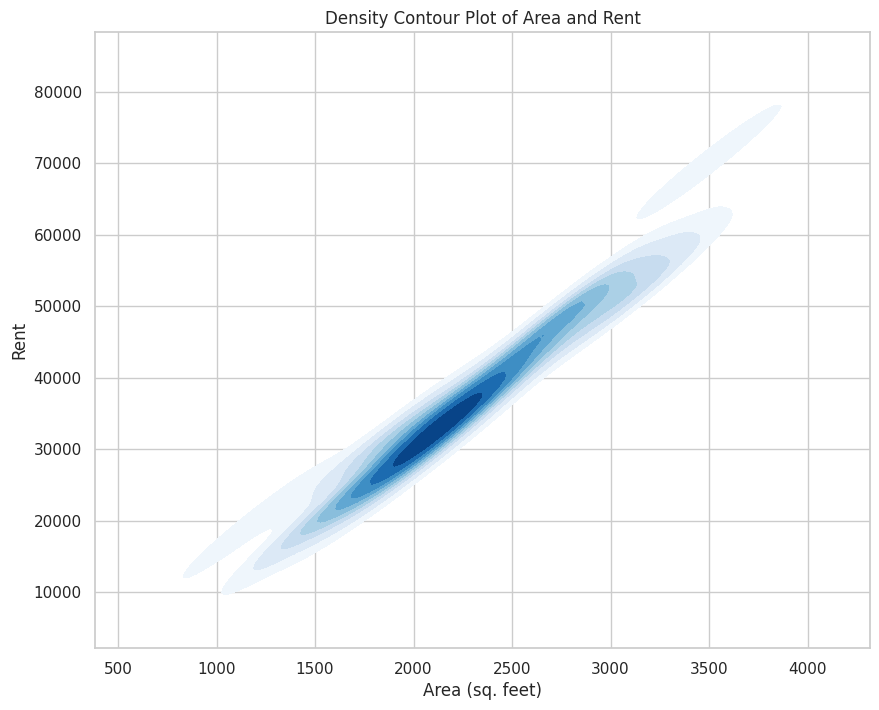

In [17]:
# Create a density contour plot for 'area' and 'rent'
plt.figure(figsize=(10, 8))
sns.kdeplot(x='area', y='rent', data=df, fill=True, cmap='Blues', levels=10)
plt.title('Density Contour Plot of Area and Rent')
plt.xlabel('Area (sq. feet)')
plt.ylabel('Rent')
plt.show()


**How to create a hexbin plot to visualize the density of data points for 'area' and 'rent'?**

<Figure size 1000x800 with 0 Axes>

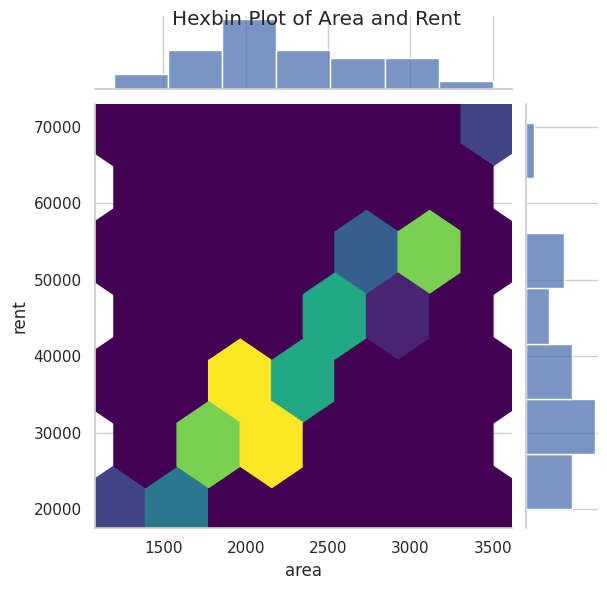

In [18]:
# Create a hexbin plot for 'area' and 'rent'
plt.figure(figsize=(10, 8))
sns.jointplot(x='area', y='rent', data=df, kind='hex', cmap='viridis')
plt.suptitle('Hexbin Plot of Area and Rent')
plt.show()


**Can we explore the distribution of 'area' and 'rent' using an area plot?**

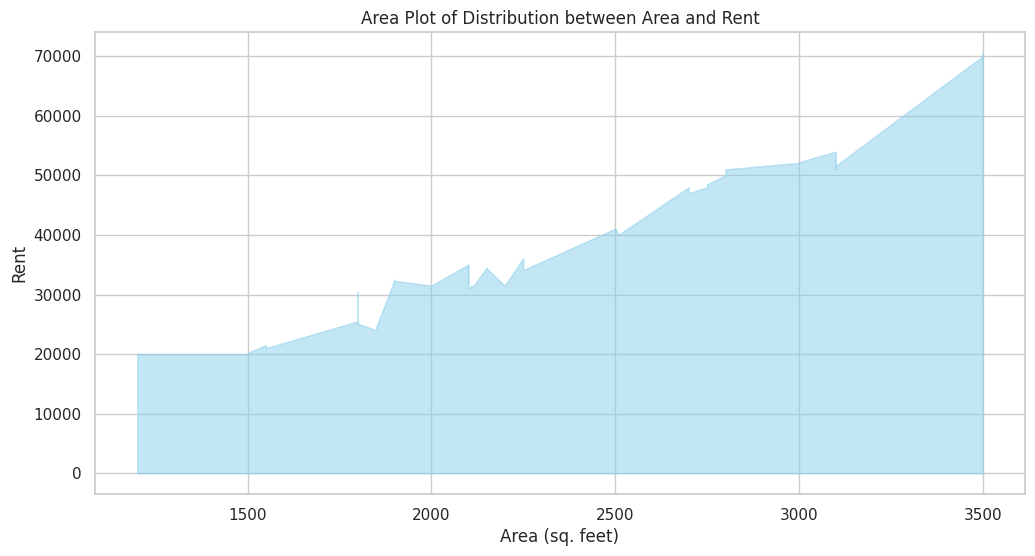

In [19]:
# Create an area plot for the distribution of 'area' and 'rent'
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by='area')
plt.fill_between(df_sorted['area'], df_sorted['rent'], color='skyblue', alpha=0.5)
plt.title('Area Plot of Distribution between Area and Rent')
plt.xlabel('Area (sq. feet)')
plt.ylabel('Rent')
plt.show()


**How to create a bar plot to visualize the average 'rent' for each 'area' range?**

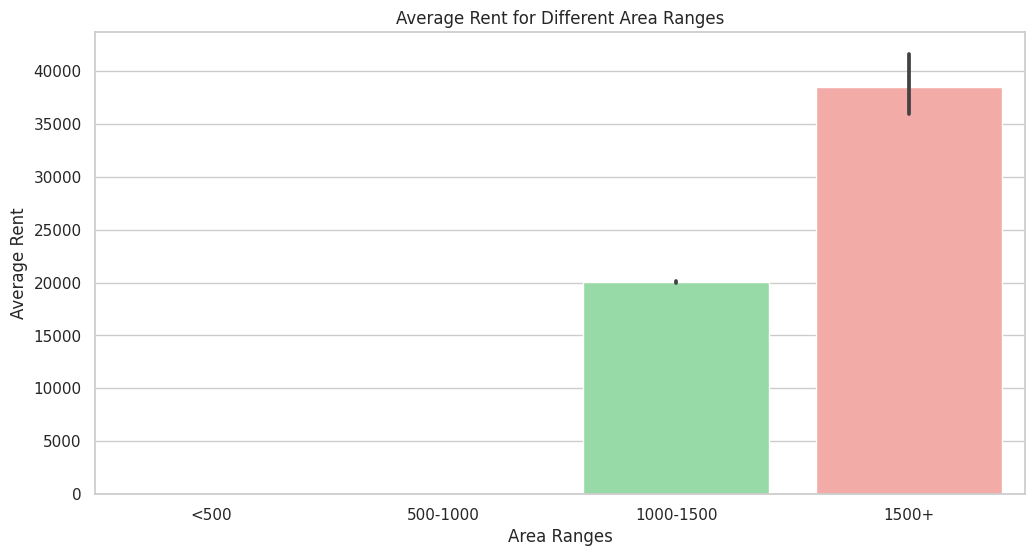

In [20]:
# Create a bar plot for the average 'rent' in different 'area' ranges
plt.figure(figsize=(12, 6))
sns.barplot(x=pd.cut(df['area'], bins=[0, 500, 1000, 1500, np.inf], labels=['<500', '500-1000', '1000-1500', '1500+']),
            y='rent', data=df, palette='pastel')
plt.title('Average Rent for Different Area Ranges')
plt.xlabel('Area Ranges')
plt.ylabel('Average Rent')
plt.show()


**How to create a stacked area plot to show the contribution of 'area' to the total 'rent'?**

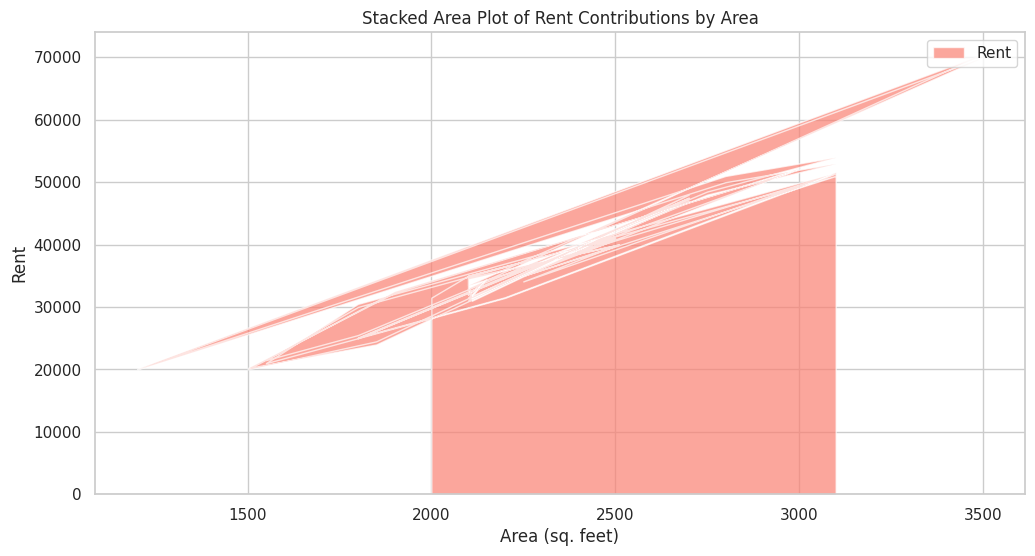

In [21]:
# Create a stacked area plot for 'area' contributing to the total 'rent'
plt.figure(figsize=(12, 6))
plt.stackplot(df['area'], df['rent'], labels=['Rent'], colors=['salmon'], alpha=0.7)
plt.title('Stacked Area Plot of Rent Contributions by Area')
plt.xlabel('Area (sq. feet)')
plt.ylabel('Rent')
plt.legend()
plt.show()


**How to create a sunburst chart to explore the hierarchical relationship between 'area' and 'rent'?**

In [22]:

# Create a sunburst chart for hierarchical relationship
fig = px.sunburst(df, path=['area', 'rent'])
fig.update_layout(title='Sunburst Chart of Area and Rent')
fig.show()

**What is the distribution of 'rent' for different 'area' categories using a fan chart?**

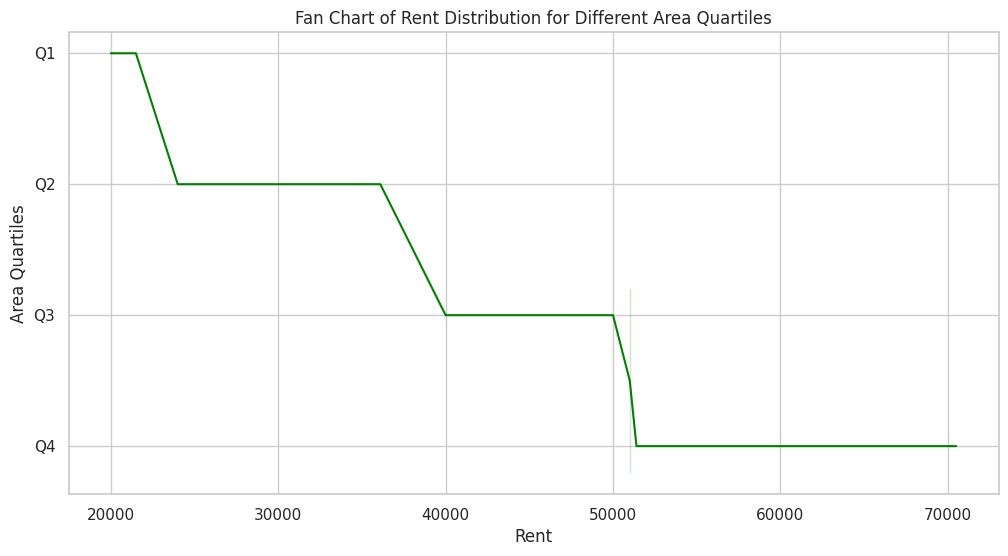

In [23]:
# Create a fan chart to visualize the distribution of 'rent' for different 'area' categories
plt.figure(figsize=(12, 6))
df_fan = df.copy()
df_fan['area'] = pd.cut(df_fan['area'], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sns.lineplot(x='rent', y='area', data=df_fan, color='green', ci='sd')
plt.title('Fan Chart of Rent Distribution for Different Area Quartiles')
plt.xlabel('Rent')
plt.ylabel('Area Quartiles')
plt.show()
